# Getting Ahead of the Headline 
Analyzing employee emails using Natural Language Processing, Sentiment Analysis, and Time Series Analysis<br>
>Paige Guajardo<br>
Rajaram Gautam<br>
Stephanie Jones<br>
Kaniela Denis<br><br>

# Executive Summary
## Background
Enron Corporation was a major American energy, commodities, and services company that declared bankruptcy in December 2001 after over a decade of fraudulent accounting practices. During an error of more lenient financial regulations and high market speculation, Enron hid its financial losses in special purposes entities, making it appear much more profitable on paper than it actually was.<br><br>

Enron has become synonymous with willful corporate fraud and corruption. The scandal also brought into question the accounting practices and activities of many corporations in the United States and was a factor in the enactment of the Sarbanes-Oxley Act of 2002. The scandal also affected the greater business world by causing the dissolution of the Arthur Andersen accounting firm, which had been Enron's main auditor for years.
## About the Project
In this unsupervised machine learning project we are exploring and analyzing Enron employee emails. We are using topic modeling, sentiment analysis, and time series analysis to identify trends in communication themes over time.

## Project Goal
For our MVP we are looking at a corpus of 5,575 emails sent by people of interest, as identified by the official congressional report on the role of Enron's board of directors (https://bit.ly/3Hjz5rI) on the collapse of the company.
#### Data Dictionary
variable | dtype | description
:-- | :-- | :--
`date` | datetime | date email was sent
`file` | object | email file path (storage)
`sender` | object | email sender email address
`subject` | object | text of email subject
`content` | object | raw email content
`lemmatize` | object | cleaned and lemmatized email content
`sentiment` | float | sentiment score
`polarity` | float | measure of email sentiment, -1 (neg) to 1 (pos)
`subjectivity` | float | measure of email subjectivity, 0 (obj), 1 (sub)
`poi` | bool | True == Person of Interest, someone connected to investigation (more on this below)
`is_internal` | bool | True == email was sent from Enron address

## Initial Hypothesis
Our initial hypothesis is that there will be distinct trends in email topics and sentiment over time. 

# Data Science Pipeline

## 00_planning
We used a [Trello Board](https://trello.com/b/osnQZqjJ/enronnlp-project) for planning.

## 01_wrangle
1. Acquire<br>
Data source: [Kaggle](https://www.kaggle.com/wcukierski/enron-email-dataset), Will Cukierski | 2016
>To acquire the raw data used for this project, download the csv file from the link above to your local drive and used the `pandas` library to read to a DataFrame. For instructions on downloading `pandas` see [README.md](https://github.com/Enron-Discussion-NLP/Capstone/blob/014d19cd2bfe023333f67e7bf5c30a1f13858e11/README.md), Steps to Recreate, Step 4. 

2. Clean
Steps for Data Cleaning
>- Import `email.parser` library for text parsing (see [README.md](https://github.com/Enron-Discussion-NLP/Capstone/blob/014d19cd2bfe023333f67e7bf5c30a1f13858e11/README.md), Steps to Recreate, Step 4) and parse email contents
>- apply .lower(), .strip(), regex, normalize(), and encode() function to email body contents 
>- tokenize email body contents
>- remove stop words
>- stem and lemmatize
>- changed date column dtype to datetime
>- dropped nulls

3. Engineered Features
The following sentiment score algorithms were applied to cleaned email body contents see [README.md](https://github.com/Enron-Discussion-NLP/Capstone/blob/014d19cd2bfe023333f67e7bf5c30a1f13858e11/README.md), Steps to Recreate, Step 4
>- Vader Sentiment Intensity Analyzer 
>- Textblob Polarity and Subjectivity
>- `is_internal` (`True` if email has @enron in address)
>- `poi` see [README.md](https://github.com/Enron-Discussion-NLP/Capstone/blob/014d19cd2bfe023333f67e7bf5c30a1f13858e11/README.md) for additional information on Persons of Interest

In [4]:
import pandas as pd
import datetime

# reading in csv file of wrangled data
df = pd.read_csv('clean.csv').drop(columns = ['Unnamed: 0'])

# correcting date dtype to datetime
df.date = pd.to_datetime(df.date)

# dropping nulls in lemm column
df.lemmatize.dropna(inplace = True)

print(f'This file contains {df.shape[0]} rows of data and {df.shape[1]} columns.')
print(f'There are {df.lemmatize.isna().sum()} null values in cleaned text column.')

This file contains 516796 rows of data and 12 columns.
There are 283 null values in cleaned text column.


## 02_explore

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516796 entries, 0 to 516795
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   date          516796 non-null  datetime64[ns]
 1   file          516796 non-null  object        
 2   sender        516796 non-null  object        
 3   subject       497681 non-null  object        
 4   content       516796 non-null  object        
 5   lemmatize     516513 non-null  object        
 6   sentiment     516796 non-null  float64       
 7   polarity      516796 non-null  float64       
 8   subjectivity  516796 non-null  float64       
 9   poi           516796 non-null  bool          
 10  is_internal   516796 non-null  bool          
 11  year          516796 non-null  int64         
dtypes: bool(2), datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 40.4+ MB


### Univariate Exploration
What are the distributions of each variable?

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

cont_vars = ['sentiment', 'polarity', 'subjectivity', 'year']
bool_vars = ['poi', 'is_internal']

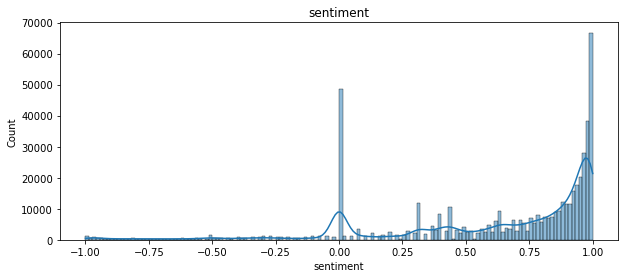

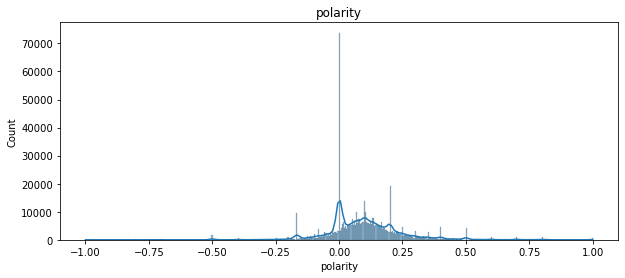

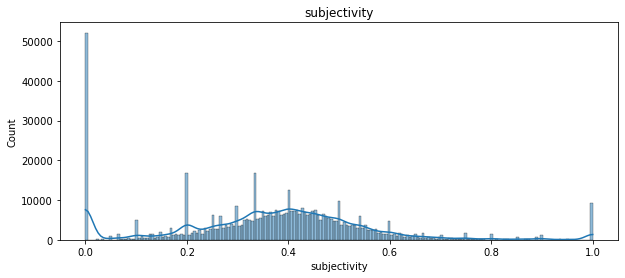

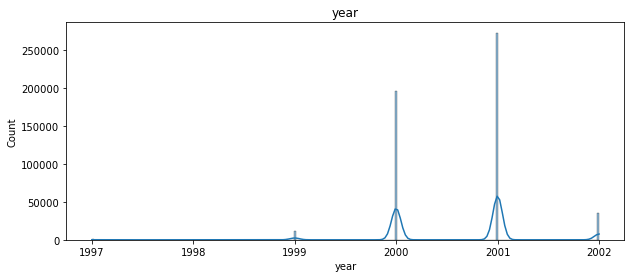

In [7]:
# distributions of continuous variables
for var in cont_vars:
    plt.figure(figsize = (10, 4))
    sns.histplot(data = df, x = var, kde = True)
    plt.title(var)
    plt.show()

- sentiment mostly left skewed, polarity and subjectivity normal*ishly* distributed
- most emails in 2000 and 2001

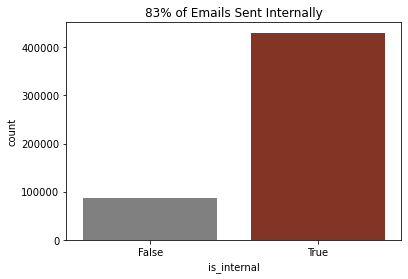

In [8]:
# distributions of bools variables
plt.figure(figsize = (6, 4))
sns.countplot(data = df, x = 'is_internal', palette = ['grey', '#912a15'])
plt.title(f'{round(df.is_internal.mean()*100)}% of Emails Sent Internally')
plt.show()

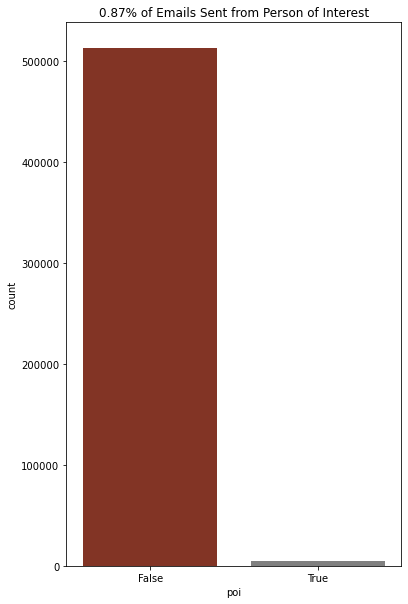

In [9]:
plt.figure(figsize = (6, 10))
sns.countplot(data = df, x = 'poi', palette = ['#912a15', 'grey'])
plt.title(f'{round(df.poi.mean()*100, 2)}% of Emails Sent from Person of Interest')
plt.show()

- most emails were sent from within Enron
- most emails were *not* sent from a person of interest

#### Takeaways from Univariate Exploration
This is a very large corpus of employee emails. For the mvp we will focus only on the persons of interest from the years 1999 - 2002 for further exploratory analysis.

In [10]:
# filtering df for poi and years and dropping poi column
df = df[(df.poi == True) & (df.year >= 1999) & (df.year <= 2002)].drop(columns = ['poi'])

### Bivariate Exploration

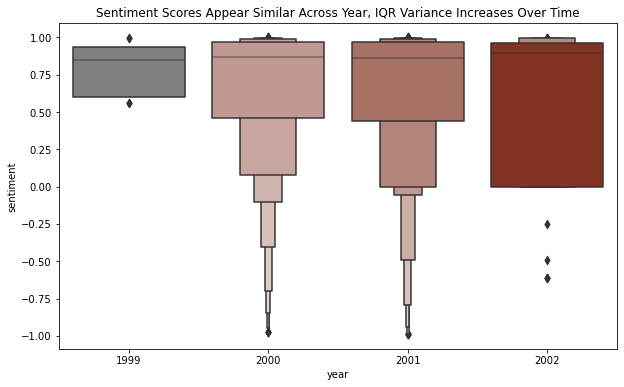

In [11]:
# how do the sentiment scores change over time?
plt.figure(figsize = (10, 6))
sns.boxenplot(data = df, x = 'year', y = 'sentiment', palette = ['grey', '#c8958a', '#b26a5b', '#912a15'])
plt.title('Sentiment Scores Appear Similar Across Year, IQR Variance Increases Over Time')
plt.show()

In [12]:
from scipy.stats import ttest_ind_from_stats

In [13]:
df.head()

,date,file,sender,subject,content,lemmatize,sentiment,polarity,subjectivity,is_internal,year
1037,2000-12-05,allen-p/all_documents/50.,tim.belden@enron.com,"New Generation, Nov 30th",---------------------- Forwarded by Tim Belden...,forwarded tim beldenhouect 12052000 0544 krist...,0.0000,-0.015152,0.393939,True,2000
1277,2001-10-23,allen-p/deleted_items/149.,jeff.richter@enron.com,Check this out -,"Phillip,\n\nWhich one should I do, the 8x12 is...",phillip one 8x12 half price jeff original mess...,0.9831,0.065981,0.428776,True,2001
1687,2000-12-05,allen-p/discussion_threads/190.,tim.belden@enron.com,"New Generation, Nov 30th",---------------------- Forwarded by Tim Belden...,forwarded tim beldenhouect 12052000 0544 krist...,0.0000,-0.015152,0.393939,True,2000
2093,2000-12-05,allen-p/notes_inbox/40.,tim.belden@enron.com,"New Generation, Nov 30th",---------------------- Forwarded by Tim Belden...,forwarded tim beldenhouect 12052000 0544 krist...,0.0000,-0.015152,0.393939,True,2000
8621,2000-08-20,badeer-r/all_documents/101.,tim.belden@enron.com,RE: Path 26 OTC increase -- IMPORTANT,check this out and let everyone know what's up...,check let everyone know ' forwarded tim belden...,0.9756,0.013605,0.358503,True,2000


In [15]:
import numpy as np

In [16]:
# Making a new column
df['year_2000'] = np.where(df['year'] == 2000, True, False)
df.head()

,date,file,sender,subject,content,lemmatize,sentiment,polarity,subjectivity,is_internal,year,year_2000
1037,2000-12-05,allen-p/all_documents/50.,tim.belden@enron.com,"New Generation, Nov 30th",---------------------- Forwarded by Tim Belden...,forwarded tim beldenhouect 12052000 0544 krist...,0.0000,-0.015152,0.393939,True,2000,True
1277,2001-10-23,allen-p/deleted_items/149.,jeff.richter@enron.com,Check this out -,"Phillip,\n\nWhich one should I do, the 8x12 is...",phillip one 8x12 half price jeff original mess...,0.9831,0.065981,0.428776,True,2001,False
1687,2000-12-05,allen-p/discussion_threads/190.,tim.belden@enron.com,"New Generation, Nov 30th",---------------------- Forwarded by Tim Belden...,forwarded tim beldenhouect 12052000 0544 krist...,0.0000,-0.015152,0.393939,True,2000,True
2093,2000-12-05,allen-p/notes_inbox/40.,tim.belden@enron.com,"New Generation, Nov 30th",---------------------- Forwarded by Tim Belden...,forwarded tim beldenhouect 12052000 0544 krist...,0.0000,-0.015152,0.393939,True,2000,True
8621,2000-08-20,badeer-r/all_documents/101.,tim.belden@enron.com,RE: Path 26 OTC increase -- IMPORTANT,check this out and let everyone know what's up...,check let everyone know ' forwarded tim belden...,0.9756,0.013605,0.358503,True,2000,True


In [ ]:
# df['year_2000'] = np.where(df['year'] == 2000, True, False)

In [ ]:
# df['year_2001'] = np.where(df['year'] == 2001, True, False)

In [ ]:
# df.head()

In [17]:
# creating series for sentiments for 2000 and 2001
sentiment_2000 = df[df.year_2000 == True].sentiment
sentiment_2001 = df[df.year_2000 == False].sentiment

In [21]:
sentiment_2001

1277      0.9831
17989     0.5859
18835     0.5859
19028     0.9824
19783     0.5859
           ...  
515596    0.5423
515629   -0.9274
515700    0.9118
515762    0.9371
515763    0.9712
Name: sentiment, Length: 1584, dtype: float64

In [ ]:
# plot distibution of sentiment for 2000
sentiment_2000.hist()

In [ ]:
# plot distibution of sentiment for 2001
sentiment_2001.hist()

In [18]:
df.head()

,date,file,sender,subject,content,lemmatize,sentiment,polarity,subjectivity,is_internal,year,year_2000
1037,2000-12-05,allen-p/all_documents/50.,tim.belden@enron.com,"New Generation, Nov 30th",---------------------- Forwarded by Tim Belden...,forwarded tim beldenhouect 12052000 0544 krist...,0.0000,-0.015152,0.393939,True,2000,True
1277,2001-10-23,allen-p/deleted_items/149.,jeff.richter@enron.com,Check this out -,"Phillip,\n\nWhich one should I do, the 8x12 is...",phillip one 8x12 half price jeff original mess...,0.9831,0.065981,0.428776,True,2001,False
1687,2000-12-05,allen-p/discussion_threads/190.,tim.belden@enron.com,"New Generation, Nov 30th",---------------------- Forwarded by Tim Belden...,forwarded tim beldenhouect 12052000 0544 krist...,0.0000,-0.015152,0.393939,True,2000,True
2093,2000-12-05,allen-p/notes_inbox/40.,tim.belden@enron.com,"New Generation, Nov 30th",---------------------- Forwarded by Tim Belden...,forwarded tim beldenhouect 12052000 0544 krist...,0.0000,-0.015152,0.393939,True,2000,True
8621,2000-08-20,badeer-r/all_documents/101.,tim.belden@enron.com,RE: Path 26 OTC increase -- IMPORTANT,check this out and let everyone know what's up...,check let everyone know ' forwarded tim belden...,0.9756,0.013605,0.358503,True,2000,True


### Stat Work Start

In [ ]:
# H(a): 2000 intensity score > 2001 intensity score // 1 tailed, 2 sample t test

In [ ]:
from scipy.stats import ttest_ind_from_stats

In [ ]:
α = 0.05


- HO: Sentiment Score of Year 2000 is equal to Sentiment Year of 2001
- H(a): Sentiment Score of Year 2000 > Sentiment Score of Year 2001

In [ ]:
sentiment_2000.var(), sentiment_2001.var()

In [ ]:
from scipy import stats

In [ ]:
t, p = stats.ttest_ind(sentiment_2000, sentiment_2001, equal_var= False)

t, p/2, α

In [ ]:
if (p/2 < α) & (t > 0):
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

In [48]:
# Function for 1 tailed 2 sample t test
from scipy import stats
from scipy.stats import ttest_ind_from_stats
import numpy as np
α = 0.05

def stats_t_test_1tail_2sample_senti():
    # creating series for sentiments for 2000 and 2001
    year_2000 = df[df.year_2000 == True].sentiment
    year_2001 = df[df.year_2000 == False].sentiment
    t, p = stats.ttest_ind(sentiment_2000, sentiment_2001, equal_var= False)

    t, p/2, α
    
    if (p/2 < α) & (t > 0):
        print('We reject the null hypothesis')
    else:
        print('We fail to reject the null hypothesis')
    

In [49]:
stats_t_test_1tail_2sample_senti()

We fail to reject the null hypothesis


In [52]:
def stats_t_test_1tail_2sample_senti_pola():
    # creating series for polaritys for 2000 and 2001
    year_2000 = df[df.year_2000 == True].polarity
    year_2001 = df[df.year_2000 == False].polarity
    t, p = stats.ttest_ind(year_2000, year_2001, equal_var= False)

    t, p/2, α
    
    if (p/2 < α) & (t > 0):
        print('We reject the null hypothesis')
    else:
        print('We fail to reject the null hypothesis')

In [53]:
stats_t_test_1tail_2sample_senti_pola()

We fail to reject the null hypothesis


In [54]:
def stats_t_test_1tail_2sample_senti_sub():
    # creating series for subjectivitys for 2000 and 2001
    year_2000 = df[df.year_2000 == True].subjectivity
    year_2001 = df[df.year_2000 == False].subjectivity
    t, p = stats.ttest_ind(year_2000, year_2001, equal_var= False)

    t, p/2, α
    
    if (p/2 < α) & (t > 0):
        print('We reject the null hypothesis')
    else:
        print('We fail to reject the null hypothesis')

In [55]:
stats_t_test_1tail_2sample_senti_sub()

We reject the null hypothesis


### Stat Work End

In [ ]:
plt.figure(figsize = (10, 6))
sns.boxenplot(data = df, x = 'year', y = 'polarity', palette = ['#912a15', '#b26a5b', '#b26a5b', 'grey'])
plt.title('Polarity Scores Appear Similar Across Year, IQR Variance Decreases Over Time')
plt.show()

In [ ]:
plt.figure(figsize = (10, 6))
sns.boxenplot(data = df, x = 'year', y = 'subjectivity', palette = ['#912a15', '#b26a5b', '#b26a5b', 'grey'])
plt.title('Subjectivity Appears to Descrease Over Time')
plt.show()

In [ ]:
# do internal emails have higher or lower sentiment scores than external emails?
sns.boxenplot(data = df, x = 'is_internal', y = 'sentiment', palette = ['grey', '#912a15'])
plt.title('Internal and External Sentiment about the Same, Internal Emails have Greater Variance')
plt.show()

In [ ]:
sns.boxenplot(data = df, x = 'is_internal', y = 'polarity', palette = ['#912a15', 'grey'])
plt.title('Polarity Higher for External Emails')
plt.show()

In [ ]:
sns.boxenplot(data = df, x = 'is_internal', y = 'subjectivity', palette = ['#912a15', 'grey'])
plt.title('Higher Subjectivity for External Emails')
plt.show()

#### Takeaways from Bivariate Exploration

### Multivariate Analysis

#### Takeaways from Multivariate Analysis

### Time Series Analysis

#### Takeaways from Time Series Analysis

## 03_model
We used the `BERTopic` topic modeling algorithms to test our hypothesis, that we could identify unique themes in the email corpus by year. The functions used for this model can be found in the `model.py` module.

In [ ]:
import model as m

# topics for 2000
m.get_topics(df[df.year == 2000])

In [ ]:
# topics for 2001

# # dropping x6 nulls from lemm text col for model to run without error
# df = df[df.lemmatize.isnull()==False]

m.get_topics(df[df.year == 2001])

In [ ]:
# topics for 2002
m.get_topics(df[df.year == 2002])

### Kenneth Lay, Robert A. Belfer, Norman P. Blake, Jr., Ronnie C. Chan, John H. Duncan, Dr. Wendy L. Gramm, Dr. Robert K. Jaedicke, Dr. Charles A. LeMaistre, Dr. John Mendelsohn, Paulo Ferraz Pereira, Frank Savage, Lord John Wakeham, Charls Walker, and Herbert S. Winokur, Jr.